# **Bitcoin**

**Entity type:** Token

**Goal**: Find top-2 scam actions about Bitcoin at Google News.

Data was crawled by GoogleNews library for Python.

In [3]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 400)

In [4]:
# reading crawled data

data = pd.read_csv('drive/MyDrive/data.csv', index_col=[0])
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8211 entries, 0 to 8227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        8211 non-null   object
 1   link         8211 non-null   object
 2   timestamp    8211 non-null   object
 3   description  8211 non-null   object
dtypes: object(4)
memory usage: 320.7+ KB


,title,link,timestamp,description
0,Bitcoin's white paper is secretly saved on Mac computers - Morning Brew,https://news.google.com/rss/articles/CBMiVWh0dHBzOi8vd3d3Lm1vcm5pbmdicmV3LmNvbS9kYWlseS9zdG9yaWVzLzIwMjMvMDQvMDcvYml0Y29pbi13aGl0ZS1wYXBlci1zYXZlZC1vbi1tYWPSAQA?oc=5,"Fri, 07 Apr 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/CBMiVWh0dHBzOi8vd3d3Lm1vcm5pbmdicmV3LmNvbS9kYWlseS9zdG9yaWVzLzIwMjMvMDQvMDcvYml0Y29pbi13aGl0ZS1wYXBlci1zYXZlZC1vbi1tYWPSAQA?oc=5"" target=""_blank"">Bitcoin's white paper is secretly saved on Mac computers</a>&nbsp;&nbsp;<font color=""#6f6f6f"">Morning Brew</font>"
1,$30K BTC price target stays valid as ‘boring’ Bitcoin heads into US jobs data - Cointelegraph,https://news.google.com/rss/articles/CBMiYmh0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy8zMGstYnRjLXByaWNlLXN0YXlzLXZhbGlkLWFzLWJvcmluZy1iaXRjb2luLWhlYWRzLWludG8tdXMtam9icy1kYXRh0gFmaHR0cHM6Ly9jb2ludGVsZWdyYXBoLmNvbS9uZXdzLzMway1idGMtcHJpY2Utc3RheXMtdmFsaWQtYXMtYm9yaW5nLWJpdGNvaW4taGVhZHMtaW50by11cy1qb2JzLWRhdGEvYW1w?oc=5,"Fri, 07 Apr 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/CBMiYmh0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy8zMGstYnRjLXByaWNlLXN0YXlzLXZhbGlkLWFzLWJvcmluZy1iaXRjb2luLWhlYWRzLWludG8tdXMtam9icy1kYXRh0gFmaHR0cHM6Ly9jb2ludGVsZWdyYXBoLmNvbS9uZXdzLzMway1idGMtcHJpY2Utc3RheXMtdmFsaWQtYXMtYm9yaW5nLWJpdGNvaW4taGVhZHMtaW50by11cy1qb2JzLWRhdGEvYW1w?oc=5"" target=""_blank"">$30K BTC price target stays valid as ‘boring’ Bitco..."
2,Do Kwon converted illicit funds from LUNA to Bitcoin: S.Korean prosecutors - Cointelegraph,https://news.google.com/rss/articles/CBMiZ2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9kby1rd29uLWNvbnZlcnRlZC1zdG9sZW4tZnVuZHMtZnJvbS1sdW5hLXRvLWJpdGNvaW4tcy1rb3JlYW4tcHJvc2VjdXRvcnPSAWtodHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvZG8ta3dvbi1jb252ZXJ0ZWQtc3RvbGVuLWZ1bmRzLWZyb20tbHVuYS10by1iaXRjb2luLXMta29yZWFuLXByb3NlY3V0b3JzL2FtcA?oc=5,"Fri, 07 Apr 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/CBMiZ2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9kby1rd29uLWNvbnZlcnRlZC1zdG9sZW4tZnVuZHMtZnJvbS1sdW5hLXRvLWJpdGNvaW4tcy1rb3JlYW4tcHJvc2VjdXRvcnPSAWtodHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvZG8ta3dvbi1jb252ZXJ0ZWQtc3RvbGVuLWZ1bmRzLWZyb20tbHVuYS10by1iaXRjb2luLXMta29yZWFuLXByb3NlY3V0b3JzL2FtcA?oc=5"" target=""_blank"">Do Kwon converted illicit funds from ..."
3,Will Easter trigger a Bitcoin price surge after weeks of stability? - Finbold - Finance in Bold,https://news.google.com/rss/articles/CBMiV2h0dHBzOi8vZmluYm9sZC5jb20vd2lsbC1lYXN0ZXItdHJpZ2dlci1hLWJpdGNvaW4tcHJpY2Utc3VyZ2UtYWZ0ZXItd2Vla3Mtb2Ytc3RhYmlsaXR5L9IBAA?oc=5,"Fri, 07 Apr 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/CBMiV2h0dHBzOi8vZmluYm9sZC5jb20vd2lsbC1lYXN0ZXItdHJpZ2dlci1hLWJpdGNvaW4tcHJpY2Utc3VyZ2UtYWZ0ZXItd2Vla3Mtb2Ytc3RhYmlsaXR5L9IBAA?oc=5"" target=""_blank"">Will Easter trigger a Bitcoin price surge after weeks of stability?</a>&nbsp;&nbsp;<font color=""#6f6f6f"">Finbold - Finance in Bold</font>"
4,Bitcoin derivatives favor further BTC price rally toward $30K - Cointelegraph,https://news.google.com/rss/articles/CBMiW2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9iaXRjb2luLWRlcml2YXRpdmVzLWZhdm9yLWZ1cnRoZXItYnRjLXByaWNlLXJhbGx5LXRvd2FyZC0zMGvSAV9odHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvYml0Y29pbi1kZXJpdmF0aXZlcy1mYXZvci1mdXJ0aGVyLWJ0Yy1wcmljZS1yYWxseS10b3dhcmQtMzBrL2FtcA?oc=5,"Fri, 07 Apr 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/CBMiW2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9iaXRjb2luLWRlcml2YXRpdmVzLWZhdm9yLWZ1cnRoZXItYnRjLXByaWNlLXJhbGx5LXRvd2FyZC0zMGvSAV9odHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvYml0Y29pbi1kZXJpdmF0aXZlcy1mYXZvci1mdXJ0aGVyLWJ0Yy1wcmljZS1yYWxseS10b3dhcmQtMzBrL2FtcA?oc=5"" target=""_blank"">Bitcoin derivatives favor further BTC price rally toward $30K</a>&nbs..."
5,Arkansas House And Senate Pass Bill Protecting Right To Mine ... - Bitcoin Magazine,https://news.google.com/rss/articles/CBMiZmh0dHBzOi8vYml0Y29pbm1hZ2F6aW5lLmNvbS9sZWdhbC9hcmthbnNhcy1ob3VzZS1hbmQtc2VuY

In [5]:
# transform object type to datetime64 and title to str
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['title'] = data['title'].astype(str)
data['title'] = data['title']
display(data['timestamp'].describe())
data.head(10)


<ipython-input-5-87440f16a13f>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(data['timestamp'].describe())


count                          8211
unique                         1485
top       2023-08-07 07:00:00+00:00
freq                            111
first     2023-04-07 07:00:00+00:00
last      2023-10-04 07:54:59+00:00
Name: timestamp, dtype: object

,title,link,timestamp,description
0,Bitcoin's white paper is secretly saved on Mac computers - Morning Brew,https://news.google.com/rss/articles/CBMiVWh0dHBzOi8vd3d3Lm1vcm5pbmdicmV3LmNvbS9kYWlseS9zdG9yaWVzLzIwMjMvMDQvMDcvYml0Y29pbi13aGl0ZS1wYXBlci1zYXZlZC1vbi1tYWPSAQA?oc=5,2023-04-07 07:00:00+00:00,"<a href=""https://news.google.com/rss/articles/CBMiVWh0dHBzOi8vd3d3Lm1vcm5pbmdicmV3LmNvbS9kYWlseS9zdG9yaWVzLzIwMjMvMDQvMDcvYml0Y29pbi13aGl0ZS1wYXBlci1zYXZlZC1vbi1tYWPSAQA?oc=5"" target=""_blank"">Bitcoin's white paper is secretly saved on Mac computers</a>&nbsp;&nbsp;<font color=""#6f6f6f"">Morning Brew</font>"
1,$30K BTC price target stays valid as ‘boring’ Bitcoin heads into US jobs data - Cointelegraph,https://news.google.com/rss/articles/CBMiYmh0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy8zMGstYnRjLXByaWNlLXN0YXlzLXZhbGlkLWFzLWJvcmluZy1iaXRjb2luLWhlYWRzLWludG8tdXMtam9icy1kYXRh0gFmaHR0cHM6Ly9jb2ludGVsZWdyYXBoLmNvbS9uZXdzLzMway1idGMtcHJpY2Utc3RheXMtdmFsaWQtYXMtYm9yaW5nLWJpdGNvaW4taGVhZHMtaW50by11cy1qb2JzLWRhdGEvYW1w?oc=5,2023-04-07 07:00:00+00:00,"<a href=""https://news.google.com/rss/articles/CBMiYmh0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy8zMGstYnRjLXByaWNlLXN0YXlzLXZhbGlkLWFzLWJvcmluZy1iaXRjb2luLWhlYWRzLWludG8tdXMtam9icy1kYXRh0gFmaHR0cHM6Ly9jb2ludGVsZWdyYXBoLmNvbS9uZXdzLzMway1idGMtcHJpY2Utc3RheXMtdmFsaWQtYXMtYm9yaW5nLWJpdGNvaW4taGVhZHMtaW50by11cy1qb2JzLWRhdGEvYW1w?oc=5"" target=""_blank"">$30K BTC price target stays valid as ‘boring’ Bitco..."
2,Do Kwon converted illicit funds from LUNA to Bitcoin: S.Korean prosecutors - Cointelegraph,https://news.google.com/rss/articles/CBMiZ2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9kby1rd29uLWNvbnZlcnRlZC1zdG9sZW4tZnVuZHMtZnJvbS1sdW5hLXRvLWJpdGNvaW4tcy1rb3JlYW4tcHJvc2VjdXRvcnPSAWtodHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvZG8ta3dvbi1jb252ZXJ0ZWQtc3RvbGVuLWZ1bmRzLWZyb20tbHVuYS10by1iaXRjb2luLXMta29yZWFuLXByb3NlY3V0b3JzL2FtcA?oc=5,2023-04-07 07:00:00+00:00,"<a href=""https://news.google.com/rss/articles/CBMiZ2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9kby1rd29uLWNvbnZlcnRlZC1zdG9sZW4tZnVuZHMtZnJvbS1sdW5hLXRvLWJpdGNvaW4tcy1rb3JlYW4tcHJvc2VjdXRvcnPSAWtodHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvZG8ta3dvbi1jb252ZXJ0ZWQtc3RvbGVuLWZ1bmRzLWZyb20tbHVuYS10by1iaXRjb2luLXMta29yZWFuLXByb3NlY3V0b3JzL2FtcA?oc=5"" target=""_blank"">Do Kwon converted illicit funds from ..."
3,Will Easter trigger a Bitcoin price surge after weeks of stability? - Finbold - Finance in Bold,https://news.google.com/rss/articles/CBMiV2h0dHBzOi8vZmluYm9sZC5jb20vd2lsbC1lYXN0ZXItdHJpZ2dlci1hLWJpdGNvaW4tcHJpY2Utc3VyZ2UtYWZ0ZXItd2Vla3Mtb2Ytc3RhYmlsaXR5L9IBAA?oc=5,2023-04-07 07:00:00+00:00,"<a href=""https://news.google.com/rss/articles/CBMiV2h0dHBzOi8vZmluYm9sZC5jb20vd2lsbC1lYXN0ZXItdHJpZ2dlci1hLWJpdGNvaW4tcHJpY2Utc3VyZ2UtYWZ0ZXItd2Vla3Mtb2Ytc3RhYmlsaXR5L9IBAA?oc=5"" target=""_blank"">Will Easter trigger a Bitcoin price surge after weeks of stability?</a>&nbsp;&nbsp;<font color=""#6f6f6f"">Finbold - Finance in Bold</font>"
4,Bitcoin derivatives favor further BTC price rally toward $30K - Cointelegraph,https://news.google.com/rss/articles/CBMiW2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9iaXRjb2luLWRlcml2YXRpdmVzLWZhdm9yLWZ1cnRoZXItYnRjLXByaWNlLXJhbGx5LXRvd2FyZC0zMGvSAV9odHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvYml0Y29pbi1kZXJpdmF0aXZlcy1mYXZvci1mdXJ0aGVyLWJ0Yy1wcmljZS1yYWxseS10b3dhcmQtMzBrL2FtcA?oc=5,2023-04-07 07:00:00+00:00,"<a href=""https://news.google.com/rss/articles/CBMiW2h0dHBzOi8vY29pbnRlbGVncmFwaC5jb20vbmV3cy9iaXRjb2luLWRlcml2YXRpdmVzLWZhdm9yLWZ1cnRoZXItYnRjLXByaWNlLXJhbGx5LXRvd2FyZC0zMGvSAV9odHRwczovL2NvaW50ZWxlZ3JhcGguY29tL25ld3MvYml0Y29pbi1kZXJpdmF0aXZlcy1mYXZvci1mdXJ0aGVyLWJ0Yy1wcmljZS1yYWxseS10b3dhcmQtMzBrL2FtcA?oc=5"" target=""_blank"">Bitcoin derivatives favor further BTC price rally toward $30K</a>&nbs..."
5,Arkansas House And Senate Pass Bill Protecting Right To Mine ... - Bitcoin Magazine,https://news.google.com/rss/articles/CBMiZmh0dHBzOi8vYml0Y29pbm1hZ2F6aW5lLmNvbS9sZWdhbC9hcmthbnNhcy1ob3VzZS1hbmQtc2VuYXRlLXBhc3MtYmlsbC1wcm90ZWN0aW5

There is 8211 entries and 4 columns. Dates of these mentions is between 2023-04-06 and 2023-10-03.

Now prepare data.

In [6]:
word = 'scam'
scam_data = data.query('title.str.contains(@word)', engine='python')

def get_loose_from_title(string):
  reg_exp = '([$£])([0-9,.]*)(.)'
  p = re.compile(reg_exp, re.IGNORECASE)
  matches = p.findall(string)
  values = []
  res = ""
  if len(matches) > 0:
    for m in matches:
      values.append("".join(m))

  res = " ".join(values)
  return res.lower()

def proceed_value(row):

  cur_exp = '[$£]'
  currency_re = re.compile(cur_exp, re.IGNORECASE)
  value_exp = '[0-9]'
  value_re = re.compile(value_exp, re.IGNORECASE)
  deg_exp = '[mk]'
  deg_re = re.compile(deg_exp, re.IGNORECASE)

  row['deg'] = ''
  row['value'] = 0

  matches = {}

  matches['currency'] = currency_re.findall(row['value_string'])
  matches['deg'] = deg_re.findall(row['value_string'])
  matches['value'] = value_re.findall(row['value_string'])

  deg_dict = {
      'm': 1000000,
      'k': 1000
  }
  for key in matches:
    if len(matches[key]) > 0:
      res = ""
      for m in matches[key]:
        res += "".join(m)

      if key == 'value' and row['deg'] != '':
        # preparing value for sorting
        row[key] = int(res) * deg_dict[row['deg']]
      else:
        row[key] = res


  row['value'] = int(row['value'])
  return row


scam_data['value_string'] = scam_data['title'].apply(lambda x: get_loose_from_title(x))
scam_data = scam_data.apply(lambda row: proceed_value(row), axis=1)
scam_data.sort_values(by='value', inplace=True, ascending=False)
scam_data[['title', 'link', 'value', 'currency', 'timestamp']].head(10)




<ipython-input-6-f4f2989baa60>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scam_data['value_string'] = scam_data['title'].apply(lambda x: get_loose_from_title(x))


,title,link,value,currency,timestamp
2923,Indian authorities arrest ringleaders of $120M crypto scam - CryptoSlate,https://news.google.com/rss/articles/CBMiUmh0dHBzOi8vY3J5cHRvc2xhdGUuY29tL2luZGlhbi1hdXRob3JpdGllcy1hcnJlc3QtcmluZ2xlYWRlcnMtb2YtMTIwbS1jcnlwdG8tc2NhbS_SAVhodHRwczovL2NyeXB0b3NsYXRlLmNvbS9pbmRpYW4tYXV0aG9yaXRpZXMtYXJyZXN0LXJpbmdsZWFkZXJzLW9mLTEyMG0tY3J5cHRvLXNjYW0vP2FtcD0x?oc=5,120000000,$,2023-08-09 07:00:00+00:00
7826,Connecticut authorities recover $3m worth of Bitcoin from scammers ... - Investing.com,https://news.google.com/rss/articles/CBMifGh0dHBzOi8vd3d3LmludmVzdGluZy5jb20vbmV3cy9jcnlwdG9jdXJyZW5jeS1uZXdzL2Nvbm5lY3RpY3V0LWF1dGhvcml0aWVzLXJlY292ZXItM20td29ydGgtb2YtYml0Y29pbi1mcm9tLXNjYW1tZXJzLTMxODcyOTnSAYQBaHR0cHM6Ly9tLmludmVzdGluZy5jb20vbmV3cy9jcnlwdG9jdXJyZW5jeS1uZXdzL2Nvbm5lY3RpY3V0LWF1dGhvcml0aWVzLXJlY292ZXItM20td29ydGgtb2YtYml0Y29pbi1mcm9tLXNjYW1tZXJzLTMxODcyOTk_YW1wTW9kZT0x?oc=5,3000000,$,2023-09-30 18:35:00+00:00
7397,PQB crime report: Resident bilked out of $13.5K in bitcoin phone scam - vancouverislandfreedaily.com,https://news.google.com/rss/articles/CBMieGh0dHBzOi8vd3d3LnZhbmNvdXZlcmlzbGFuZGZyZWVkYWlseS5jb20vbG9jYWwtbmV3cy9wcWItY3JpbWUtcmVwb3J0LXJlc2lkZW50LWJpbGtlZC1vdXQtb2YtMTMtNWstaW4tYml0Y29pbi1waG9uZS1zY2FtL9IBAA?oc=5,135000,$,2023-09-25 12:35:00+00:00
3237,Somerset woman loses £40k in online scam - BBC,https://news.google.com/rss/articles/CBMiNWh0dHBzOi8vd3d3LmJiYy5jb20vbmV3cy91ay1lbmdsYW5kLXNvbWVyc2V0LTY2NDcyOTE40gE5aHR0cHM6Ly93d3cuYmJjLmNvbS9uZXdzL3VrLWVuZ2xhbmQtc29tZXJzZXQtNjY0NzI5MTguYW1w?oc=5,40000,£,2023-08-12 07:00:00+00:00
2882,Area resident falls prey to $35K remote-access computer scam: OPP - The London Free Press,https://news.google.com/rss/articles/CBMiY2h0dHBzOi8vbGZwcmVzcy5jb20vbmV3cy9sb2NhbC1uZXdzL2FyZWEtcmVzaWRlbnQtZmFsbHMtcHJleS10by0zNWstcmVtb3RlLWFjY2Vzcy1jb21wdXRlci1zY2FtLW9wcNIBkQFodHRwczovL2xmcHJlc3MuY29tL25ld3MvbG9jYWwtbmV3cy9hcmVhLXJlc2lkZW50LWZhbGxzLXByZXktdG8tMzVrLXJlbW90ZS1hY2Nlc3MtY29tcHV0ZXItc2NhbS1vcHAvd2NtL2RjZTYyYzBkLTViOWQtNDJmOS05YmE3LWQzNDUxMzBkNjRjYy9hbXAv?oc=5,35000,$,2023-08-08 07:00:00+00:00
2975,Microsoft crypto scam steals $35K in bitcoin with fake firewall - Protos,https://news.google.com/rss/articles/CBMiUmh0dHBzOi8vcHJvdG9zLmNvbS9taWNyb3NvZnQtY3J5cHRvLXNjYW0tc3RlYWxzLTM1ay1pbi1iaXRjb2luLXdpdGgtZmFrZS1maXJld2FsbC_SAQA?oc=5,35000,$,2023-08-09 07:00:00+00:00
5568,Couple loses $19400 in Bitcoin scam – Times News Online - tnonline.com,https://news.google.com/rss/articles/CBMiRWh0dHBzOi8vd3d3LnRub25saW5lLmNvbS8yMDIzMDkwNi9jb3VwbGUtbG9zZXMtMTk0MDAtaW4tYml0Y29pbi1zY2FtL9IBAA?oc=5,19400,$,2023-09-06 07:00:00+00:00
3047,"CONSUMER FIRST ALERT: Bitcoin, PayPal scam nearly costs Wisconsin woman $16,000 - WBAY",https://news.google.com/rss/articles/CBMibGh0dHBzOi8vd3d3LndiYXkuY29tLzIwMjMvMDgvMTAvY29uc3VtZXItZmlyc3QtYWxlcnQtYml0Y29pbi1wYXlwYWwtc2NhbS1uZWFybHktY29zdHMtd2lzY29uc2luLXdvbWFuLTE2MDAwL9IBe2h0dHBzOi8vd3d3LndiYXkuY29tLzIwMjMvMDgvMTAvY29uc3VtZXItZmlyc3QtYWxlcnQtYml0Y29pbi1wYXlwYWwtc2NhbS1uZWFybHktY29zdHMtd2lzY29uc2luLXdvbWFuLTE2MDAwLz9vdXRwdXRUeXBlPWFtcA?oc=5,16000,$,2023-08-10 07:00:00+00:00
1322,"Woman scammed into converting $15K into Bitcoin sparks legal battle between crypto kiosk manager, McLennan County Sheriff’s Office - KWTX",https://news.google.com/rss/articles/CBMiqAFodHRwczovL3d3dy5rd3R4LmNvbS8yMDIzLzA2LzEzL2VsZGVybHktd29tYW4tc2NhbW1lZC1pbnRvLWNvbnZlcnRpbmctMTVrLWludG8tYml0Y29pbi1zcGFya3MtbGVnYWwtYmF0dGxlLWJldHdlZW4tY3J5cHRvLWtpb3NrLW1hbmFnZXItbWNsZW5uYW4tY291bnR5LXNoZXJpZmZzLW9mZmljZS_SAbcBaHR0cHM6Ly93d3cua3d0eC5jb20vMjAyMy8wNi8xMy9lbGRlcmx5LXdvbWFuLXNjYW1tZWQtaW50by1jb252ZXJ0aW5nLTE1ay1pbnRvLWJpdGNvaW4tc3Bhcmt...,15000,$,2023-06-13 07:00:00+00:00
4797,"Washoe County deputies recover $15,000 in bitcoin scam for Lemmon Valley resident - KRNV",https://news.google.com/rss/articles/CBMigAFodHRwczovL215bmV3czQuY29tL25ld3MvbG9jYWwvbGVtbW9uLXZhbGxleS1yZXNpZGVudC1yZWNvdmVycy0xNTAwMC1pbi1iaXRjb2luLXNjYW0tdGhhbmtzLXRvLXF1aWNrLXJlc3BvbnNlLWJ5LXdjc28tZGV0

Now check links for associating with BTC.

The first mention is not contains BTC in title or article's text.

## Associated scams

***2023-09-30***

Connecticut police assisted a crypto investor in reclaiming over $3 million in Bitcoin (BTC) after they fell victim to a high-profile financial scam.

Between January and March, the victim discovered that over $3 million worth of Bitcoin had been withdrawn and moved to cryptocurrency wallets beyond their control. Collaborating with the Connecticut State Police, Westport detectives diligently traced the transactions and successfully froze all accounts linked to the scam.

https://news.google.com/rss/articles/CBMifGh0dHBzOi8vd3d3LmludmVzdGluZy5jb20vbmV3cy9jcnlwdG9jdXJyZW5jeS1uZXdzL2Nvbm5lY3RpY3V0LWF1dGhvcml0aWVzLXJlY292ZXItM20td29ydGgtb2YtYml0Y29pbi1mcm9tLXNjYW1tZXJzLTMxODcyOTnSAYQBaHR0cHM6Ly9tLmludmVzdGluZy5jb20vbmV3cy9jcnlwdG9jdXJyZW5jeS1uZXdzL2Nvbm5lY3RpY3V0LWF1dGhvcml0aWVzLXJlY292ZXItM20td29ydGgtb2YtYml0Y29pbi1mcm9tLXNjYW1tZXJzLTMxODcyOTk_YW1wTW9kZT0x?oc=5

***2023-09-25***

PQB crime report: Resident bilked out of $13.5K in bitcoin phone scam

A resident was reported defrauded of $13,500 by following instructions from a caller claiming to be from a major bank to withdraw cash and transfer to a bitcoin ATM.

https://news.google.com/rss/articles/CBMieGh0dHBzOi8vd3d3LnZhbmNvdXZlcmlzbGFuZGZyZWVkYWlseS5jb20vbG9jYWwtbmV3cy9wcWItY3JpbWUtcmVwb3J0LXJlc2lkZW50LWJpbGtlZC1vdXQtb2YtMTMtNWstaW4tYml0Y29pbi1waG9uZS1zY2FtL9IBAA?oc=5

The pie chart below indicates that mentions of Bitcoin related to scams on Google News represented 0.5% of all mentions.

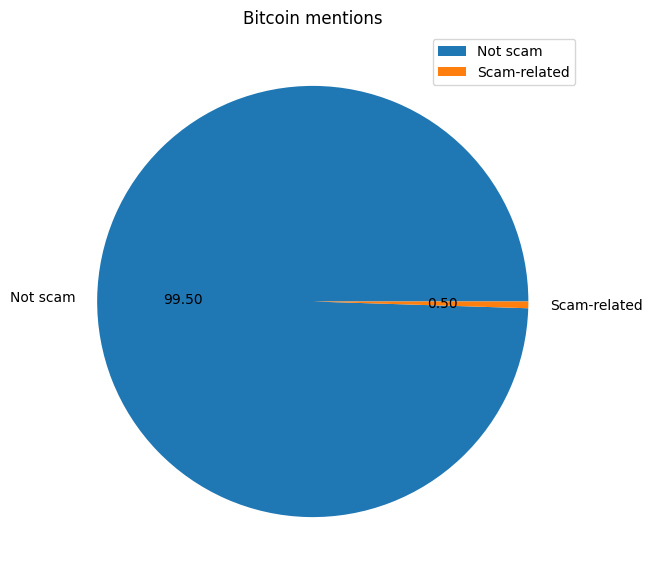

In [20]:
data['is_scam'] = False
data.loc[scam_data.index, ['is_scam']] = True

scam_pivot = pd.pivot_table(data, index='is_scam', values='title', aggfunc='count')

scam_pivot.plot(kind='pie', y='title', labels=['Not scam', 'Scam-related'], autopct="%.2f", figsize=(7, 7))
plt.title('Bitcoin mentions')
plt.ylabel('')
plt.show()


In [21]:
data_to_save = data[['timestamp', 'title', 'description', 'link']]
data_to_save.columns = ['timestamp', 'article_title', 'text', 'link']
data_to_save.to_csv('drive/MyDrive/task_data.csv')